## Time evolving foliar CN vs CO2, global runs to 2100

#### Load packages

In [1]:
#Load necessary packages for data visualization 
import xarray as xr
from ctsm_py import utils
#import utils
import numpy as np
import pandas as pd
from netCDF4 import num2date
import dask 
from scipy import stats

#some resources for plotting
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os,sys
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

%matplotlib inline
import pandas as pd
import datetime as dt
from datetime import datetime

import seaborn as sns
import math as mt

#### Read in data

In [10]:
### Data for future simulations
# User defined options
model = 'CLM5_GSWP3'
## Read in slope 0 and slope 20 cases
archive = '/glade/scratch/wwieder/archive/'
caseShort = ['cnSlope0', 'cnSlope20', 'cnMulti']
cases = ['ctsm51d074_2deg_GSWP3V1_ssp370_'+short for short in caseShort]
path = '/lnd/hist/'
fin = [archive + case + path + "concat/" + case + '_cat.nc' for case in cases]
#print(fin[0])

# Read in files for .area and .landfrac
fin2 = [archive + case + path + case + '.clm2.h0.2015-01.nc' for case in cases]
#print(fin2[0])

### Read in historical data
cases2 = ['ctsm51d074_2deg_GSWP3V1_hist_'+short for short in caseShort]
finHist = [archive + case + path + "concat/" + case + '_cat.nc' for case in cases2]

# Read in files for .area and .landfrac
finHist2 = [archive + case + path + case + '.clm2.h0.1850-01.nc' for case in cases2]
print(finHist2[0])

/glade/scratch/wwieder/archive/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0/lnd/hist/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0.clm2.h0.1850-01.nc


In [11]:
# Read in data, time and time_bounds just used for utils.time_set_mid
var = ['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX','RAIN', 'SNOW',
       'time', 'time_bounds']

'''select the variables we want to read in'''
def preprocess(ds, var=var):
    return ds[var]

# For slope 0
for i in range(len(cases)):
    dsIN = utils.time_set_mid(xr.open_mfdataset(fin[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs = utils.time_set_mid(xr.open_mfdataset(fin2[i], decode_times=True), 'time')
    dsIN['area'] = LandDs.area
    dsIN['landfrac'] = LandDs.landfrac

    if i == 0:
        ds = dsIN
    else:
        ds = xr.concat([ds,dsIN],"case",data_vars='all')


ds = ds.assign_coords(case=("case", caseShort))
ds = ds[['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX','RAIN', 'SNOW']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds

<xarray.Dataset>
Dimensions:             (case: 3, time: 1032, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/18)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Wed Aug 10 10:12:04 2022: ncap2 -s ...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [12]:
## Read in historical data

'''select the variables we want to read in'''
def preprocess(ds2, var=var):
    return ds2[var]

# For slope 0
for i in range(len(cases)):
    dsIN2 = utils.time_set_mid(xr.open_mfdataset(finHist[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs2 = utils.time_set_mid(xr.open_mfdataset(finHist2[i], decode_times=True), 'time')
    dsIN2['area'] = LandDs2.area
    dsIN2['landfrac'] = LandDs2.landfrac

    if i == 0:
        ds2 = dsIN2
    else:
        ds2 = xr.concat([ds2,dsIN2],"case",data_vars='all')


ds2 = ds2.assign_coords(case=("case", caseShort))
ds2 = ds2[['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX', 'RAIN', 'SNOW']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds2

<xarray.Dataset>
Dimensions:             (case: 3, time: 1980, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-01-16 11:44:59.999993 ... 2014-12-...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/18)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Apr 25 05:33:00 2022: ncrcat ct...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [13]:
dsFull = xr.concat([ds2,ds],"time",data_vars='all')
dsFull

<xarray.Dataset>
Dimensions:             (case: 3, time: 3012, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-01-16 11:44:59.999993 ... 2100-12-...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/18)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Apr 25 05:33:00 2022: ncrcat ct...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

### Convert monthly to annual

<xarray.Dataset>
Dimensions:             (time: 251, lon: 144, lat: 96, case: 3)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/18)
    NPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    ...                  ...
    HR                  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    RAIN                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    SNOW                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>

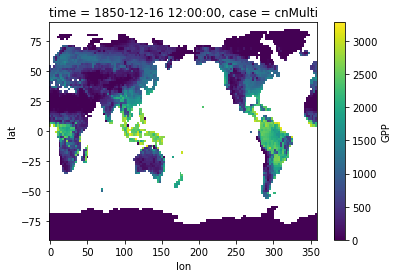

In [55]:
spy = 365 * 24 * 3600               # Convert  to annual fluxes (gC/m2/y), from gc/m2/s 
dsAnn = dsFull.apply(utils.weighted_annual_mean)
fluxes = ['GPP', 'NPP', 'NFIX', 'NET_NMIN', 'ER', 'HR', 'QVEGT', 'QVEGE','QSOIL','NBP', 'RAIN','SNOW', 'QRUNOFF_TO_COUPLER']
for i in range(len(fluxes)):
    dsAnn[fluxes[i]] = dsAnn[fluxes[i]] * spy

dsAnn.GPP.isel(time=0, case=2).plot() ;
dsAnn

In [57]:
##Load to memory
# this seems to take forever...
dsAnn = dsAnn.load()
print('loaded data to memory')

loaded data to memory


In [58]:
## Mask out really small values
minGPP2 = 10
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP2)


### Calculate Litter CN

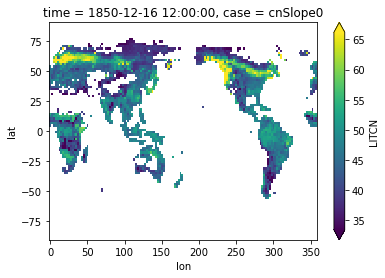

In [59]:
dsAnn['LITCN'] = dsAnn.TOTLITC / dsAnn.TOTLITN
#dsAnn.TOTMICN.values
dsAnn.LITCN.isel(time=0, case=0).plot(robust=True)
dsAnn.LITCN.mean(['lat', 'lon']).isel(time=10).values
dsAnn['LITCN'].attrs['units'] = 'gC/gN'


### Calculate ET

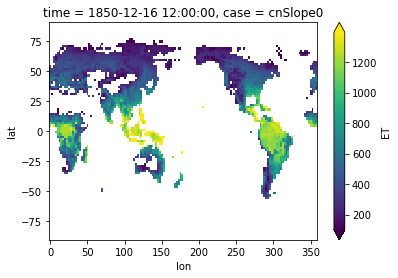

In [60]:
dsAnn['ET'] = dsAnn.QVEGT + dsAnn.QVEGE + dsAnn.QSOIL
dsAnn.ET.isel(time=0, case=0).plot(robust=True)
dsAnn.ET.mean(['lat', 'lon']).isel(time=10).values
dsAnn['ET'].attrs['units'] = 'mm y^-1'
minET = 10
dsAnn = dsAnn.where(dsAnn.ET.min('time') > minET)

### Calculate WUE

array([1.87697594, 1.87570104, 1.87647888])

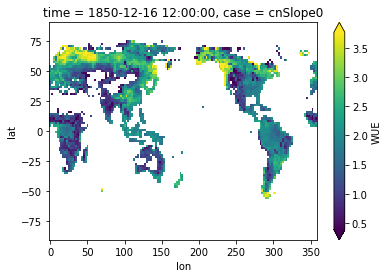

In [61]:
dsAnn['WUE'] = dsAnn.GPP / dsAnn.ET
dsAnn.WUE.isel(time=0, case=0).plot(robust=True)
dsAnn.WUE.mean(['lat', 'lon']).isel(time=0).values

### Calculate water yield

array([0.33386422, 0.33388615, 0.33356846])

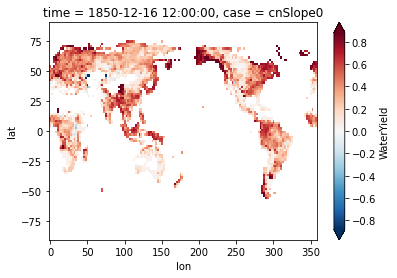

In [62]:
dsAnn['WaterYield'] = dsAnn.QRUNOFF_TO_COUPLER / (dsAnn.RAIN + dsAnn.SNOW)
dsAnn.WaterYield.isel(time=0, case=0).plot(robust=True)
dsAnn.WaterYield.mean(['lat', 'lon']).isel(time=0).values

### Check the time series

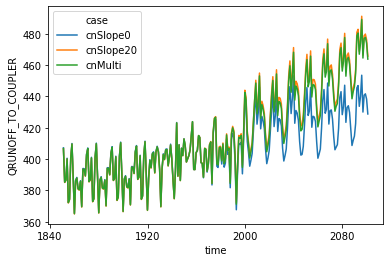

In [63]:
dsAnn.QRUNOFF_TO_COUPLER.mean(['lat', 'lon']).plot(hue='case') ;
# Mask out absurd values if needed
# dsAnn['CUE'] = dsAnn.CUE.where(dsAnn.CUE > -1).where(dsAnn.CUE < 1)

In [64]:
## Add units and metadata back into dsAnn
AllVars = ['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX']
CVars = ['NPP', 'GPP','NBP','ER', 'HR']
NVars = ['NFIX', 'NET_NMIN']
WaterVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WaterYield']
WUE = ['WUE']
for i in range(len(AllVars)):
    dsAnn.attrs[AllVars[i]] = dsFull.get(AllVars[i]).attrs
for i in range(len(CVars)): 
    dsAnn[CVars[i]].attrs['units'] = 'gC/m2/yr'
for i in range(len(NVars)): 
    dsAnn[NVars[i]].attrs['units'] = 'gN/m2/yr'
for i in range(len(WaterVars)): 
    dsAnn[WaterVars[i]].attrs['units'] = 'mm/yr'
for i in range(len(WUE)): 
    dsAnn[WUE[i]].attrs['units'] = 'gC/mm'
dsAnn

<xarray.Dataset>
Dimensions:             (case: 3, time: 251, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/22)
    NPP                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    GPP                 (case, time, lat, lon) float64 nan nan nan ... nan nan
    LEAFCN              (case, time, lat, lon) float64 nan nan nan ... nan nan
    QVEGT               (case, time, lat, lon) float64 nan nan nan ... nan nan
    QVEGE               (case, time, lat, lon) float64 nan nan nan ... nan nan
    QSOIL               (case, time, lat, lon) float64 nan nan nan ... nan nan
    ...                  ...
    RAIN                (case, time, lat, lon) float64 nan nan nan ... nan nan
    SNOW                (case, time, lat, lon) float64 nan nan nan ... nan nan
    WaterYield          (case, time, lat, lon) float64 nan nan nan ... nan nan
    LITCN               (case, time, lat, lon) float64 nan nan nan ... nan nan
    ET                  (case, time, lat, lon) float64 nan nan nan ... nan nan
    WUE                 (case, time, lat, lon) float64 nan nan nan ... nan nan
Attributes: (12/16)
    NPP:                 {'long_name': 'net primary production', 'units': 'gC...
    GPP:                 {'long_name': 'gross primary production', 'units': '...
    LEAFCN:              {'long_name': 'Leaf CN ratio used for flexible CN', ...
    QVEGT:               {'long_name': 'canopy transpiration', 'units': 'mm/s...
    QVEGE:               {'long_name': 'canopy evaporation', 'units': 'mm/s',...
    QSOIL:               {'long_name': 'Ground evaporation (soil/snow evapora...
    ...                  ...
    QRUNOFF_TO_COUPLER:  {'long_name': 'total liquid runoff sent to coupler (...
    ER:                  {'long_name': 'total ecosystem respiration, autotrop...
    HR:                  {'long_name': 'total heterotrophic respiration', 'un...
    NBP:                 {'long_name': 'net biome production, includes fire, ...
    NET_NMIN:            {'long_name': 'net rate of N mineralization', 'units...
    NFIX:                {'long_name': 'Symbiotic BNF uptake flux', 'units': ...

### Make weights for the global sum

sum area_wgt = 0.9999999


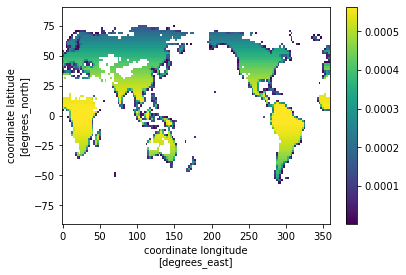

In [65]:
# only weight areas for grids with GPP>0
minGPP = 10.
landUp = LandDs.area * LandDs.landfrac * 1e6      # area in km2, not m2
landUp = landUp.where(dsAnn.GPP.isel(case=0).min('time') > minGPP)
landUp.attrs['units'] = 'm^2'

# weighting for each grid cell
area_wgt = (landUp / landUp.sum()).drop('case')
area_wgt.plot()
print('sum area_wgt = '+ str(area_wgt.sum().values) )

### Calculate the global sums

In [66]:
# ?? This could also be done regionally (see Paul's comments on google doc) ??
ann_glob = (dsAnn * landUp).sum(dim=('lat', 'lon'))

## 1 mm water = 1 kg/m2,  1e-15 for kg to Tt,  1e-15 gC to PgC,
# convert to Pg C/y, mm to Tt
Cvars = ['TOTVEGC','GPP','NPP', 'NBP', 'HR', 'ER']
Nvars = ['NFIX', 'NET_NMIN']
Water = ['ET', 'QRUNOFF_TO_COUPLER', 'WaterYield']
CNvars = ['LITCN','LEAFCN']
for i in range(len(Cvars)):
    ann_glob[Cvars[i]] = ann_glob[Cvars[i]] * 1e-15
    if Cvars[i] == 'TOTVEGC':
        
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C'
    else: 
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C y^-1'
         
for i in range(len(Nvars)):
    ann_glob[Nvars[i]] = ann_glob[Nvars[i]] * 1e-12
    ann_glob[Nvars[i]].attrs['units'] = 'Tg N y^-1'

# for i in range(len(Water)):
#     ann_glob[Water[i]] = ann_glob[Water[i]] * 1e-12
#     ann_glob[Water[i]].attrs['units'] = 'Tg y^-1'
        
##Add metadata
for i in range(len(Cvars)):
    ann_glob.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
for i in range(len(Nvars)):
    ann_glob.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs


# area weighted mean
ann_Awgt = (dsAnn * area_wgt).sum(dim=('lat', 'lon'))

##Add metadata
for i in range(len(Cvars)):
    ann_Awgt.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
    ann_Awgt[Cvars[i]].attrs['units'] = 'Pg C y^-1'
for i in range(len(Nvars)):
    ann_Awgt.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs
    ann_Awgt[Nvars[i]].attrs['units'] = 'TgN y^-1'
for i in range(len(CNvars)):
    ann_Awgt.attrs[CNvars[i]] = dsAnn.get(CNvars[i]).attrs
for i in range(len(Water)):
    ann_Awgt.attrs[Water[i]] = dsAnn.get(Water[i]).attrs
    ann_Awgt[Water[i]].attrs['units'] = 'mm y^-1'
ann_Awgt['WUE'].attrs['units'] = 'gC/mm'

### Varible lists and subset 2 cases to use

In [67]:
#quick plot , the `;` on the last line supresses text after executing the cell
vars = ['GPP', 'NPP', 'TOTVEGC', 'CUE', 'EFLX_LH_TOT', 'LEAFCN']
globVars = ['GPP', 'NPP', 'NBP', 'TOTVEGC', 'NFIX', 'NET_NMIN']
vars2 = ['EFLX_LH_TOT', 'LEAFCN', 'LITCN']

ann_glob_sub = ann_glob.isel(case = [0,1])
ann_glob_sub.attrs = ann_glob.attrs
ann_Awgt_sub = ann_Awgt.isel(case = [0,1])
ann_Awgt_sub.attrs = ann_Awgt.attrs
ann_Awgt_sub

<xarray.Dataset>
Dimensions:             (time: 251, case: 2)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * case                (case) <U9 'cnSlope0' 'cnSlope20'
Data variables: (12/22)
    NPP                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    GPP                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    LEAFCN              (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QVEGT               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QVEGE               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    QSOIL               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    ...                  ...
    RAIN                (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    SNOW                (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    WaterYield          (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    LITCN               (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    ET                  (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
    WUE                 (case, time) float64 dask.array<chunksize=(2, 251), meta=np.ndarray>
Attributes: (12/13)
    TOTVEGC:             {'units': 'Pg C'}
    GPP:                 {'units': 'Pg C y^-1'}
    NPP:                 {'units': 'Pg C y^-1'}
    NBP:                 {'units': 'Pg C y^-1'}
    HR:                  {'units': 'Pg C y^-1'}
    ER:                  {'units': 'Pg C y^-1'}
    ...                  ...
    NET_NMIN:            {'units': 'Tg N y^-1'}
    LITCN:               {'units': 'gC/gN'}
    LEAFCN:              {}
    ET:                  {'units': 'mm/yr'}
    QRUNOFF_TO_COUPLER:  {'units': 'mm/yr'}
    WaterYield:          {'units': 'mm/yr'}

### Check diffs between cnMulti and cnSlope20


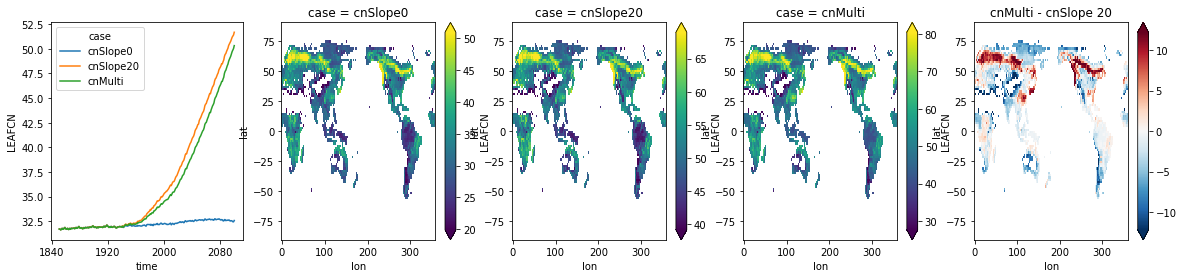

In [41]:
## Leaf and litter CN plots
# Include NPP, Nmin, Nfix, LITTERCN
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['LEAFCN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(1):
    fig, ax = plt.subplots(1, 5, figsize=(20,4))
    ann_Awgt.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    X = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')[EcoVars[i]]
    z = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-1,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'LEAFCN':
        zdiff.plot(robust = True, ax = ax[4])#, cmap = 'Blues_r')
        plt.title('cnMulti - cnSlope 20');
        z.plot(robust = True, ax = ax[2])
        z20.plot(robust = True, ax = ax[3])
        X.plot(robust = True, ax = ax[1])

## Plots demonstrating C:N change implemented (Fig 1)

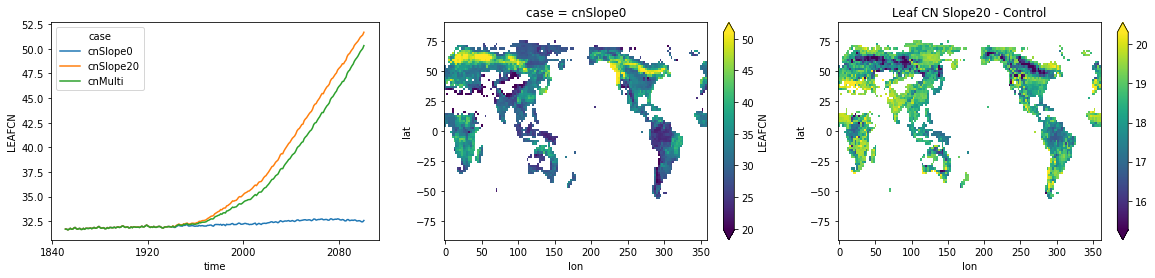

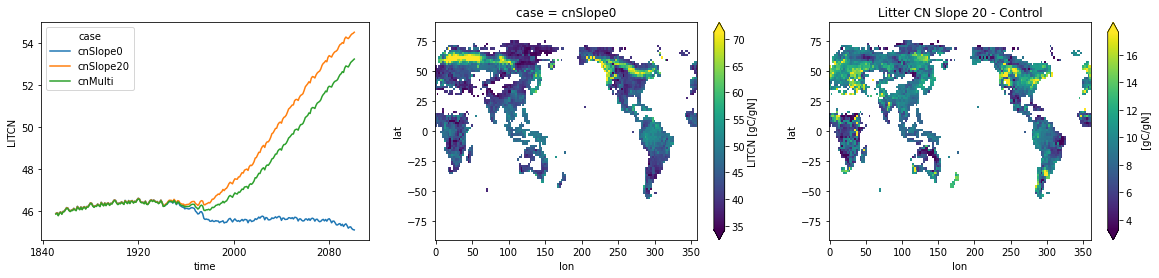

In [42]:
## Leaf and litter CN plots
# Include NPP, Nmin, Nfix, LITTERCN
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['LEAFCN', 'LITCN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_Awgt.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
        
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'LEAFCN':
        zdiff.plot(robust = True, ax = ax[2])
        plt.title('Leaf CN Slope20 - Control')
        z.plot(robust = True, ax = ax[1])#, cmap = 'Blues_r') ;
    if EcoVars[i] == 'LITCN':
        zdiff.plot(robust = True, ax = ax[2])
        plt.title('Litter CN Slope 20 - Control')
        z.plot(robust = True, ax = ax[1])#, cmap = 'Reds') ;
        
##Should I select another color scheme for these maps? Can I change label on the 2nd map of each set? 


## C Cycling plots (Figure 2)
 - NPP, line plot, map of control, map of cnMulti - control
 - HR, line plot, map of control, map of cnMulti - control
 
 Notes: include HR only but wanted to look at ER too. ER/GPP are more similar, HR/NPP more similar. 

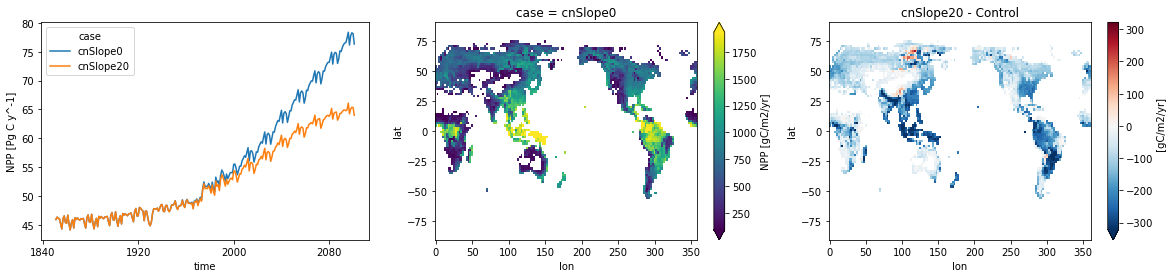

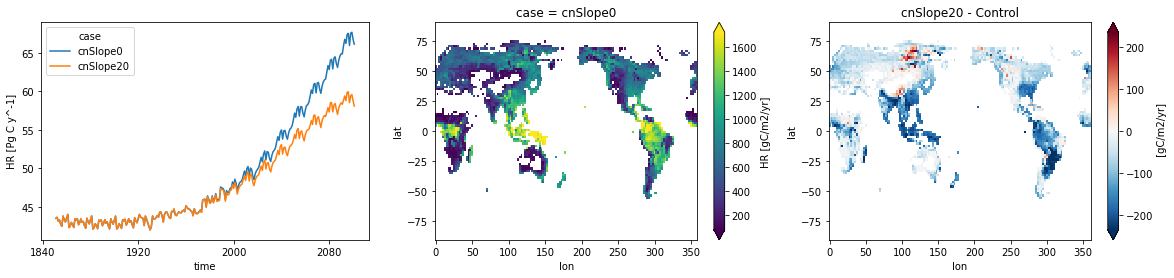

In [43]:
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['NPP', 'HR' ] #'ER'
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_glob_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    zdiff.attrs[EcoVars[i]] = dsAnn.get(EcoVars[i]).attrs

    if EcoVars[i] == 'NPP':
        z.plot(robust = True, ax = ax[1])
        plt.title('NPP Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('cnSlope20 - Control')
    if EcoVars[i] == 'HR':
        z.plot(robust = True, ax = ax[1])
        plt.title('HR Control')
        zdiff.plot(robust = True, ax = ax[2])# cmap = 'Blues_r') ;
        plt.title('cnSlope20 - Control')
    # if EcoVars[i] == 'ER':
    #     z.plot(robust = True, ax = ax[1])
    #     plt.title('ER Control')
    #     zdiff.plot(robust = True, ax = ax[2], cmap = 'Blues_r') ;
    #     plt.title('cnSlope20 - Control')

### For these plots, should I change color scheme of maps? 

## NBP Plots (Fig. 3, or maybe move this up? This is the central figure)
4 panel plot
    a) annual average NPB, line plot
    b) cumulative NBP, line plot
    c) Map, control case NBP 2100
    d) Map, cnMulti - control case 2100

In [44]:
# Cumulative annual flux over time   
cNBP = {}
cNBP['NBP'] = ann_glob['NBP'].cumsum(dim='time').load()

In [45]:
##Make NBP part of ann_glob dataframe
dsAnn['cumNBP'] = dsAnn['NBP'].cumsum(dim='time').load()
dsAnn['cumNBP'].attrs['units'] = 'gC/m2'

### Read in csv file of 2016 GCP data to add to NBP plot


In [30]:
gcp = pd.read_csv('GCP_2016.csv')

In [31]:
UC = 0.8
landHigh = gcp.Land - gcp.LULCC + UC
landLow = gcp.Land - gcp.LULCC - UC
land = gcp.Land- gcp.LULCC
cum_Land = land.cumsum()
cum_LandH = landHigh.cumsum()
cum_LandL =  landLow.cumsum()

In [32]:
from datetime import date

start = date(1960, 1, 1) 
end = date(2016, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]

start2 = date(1960, 1, 1) 
end2 = date(2099, 1, 1)

year_range2 = [year for year in range(start2.year, end2.year +1)]

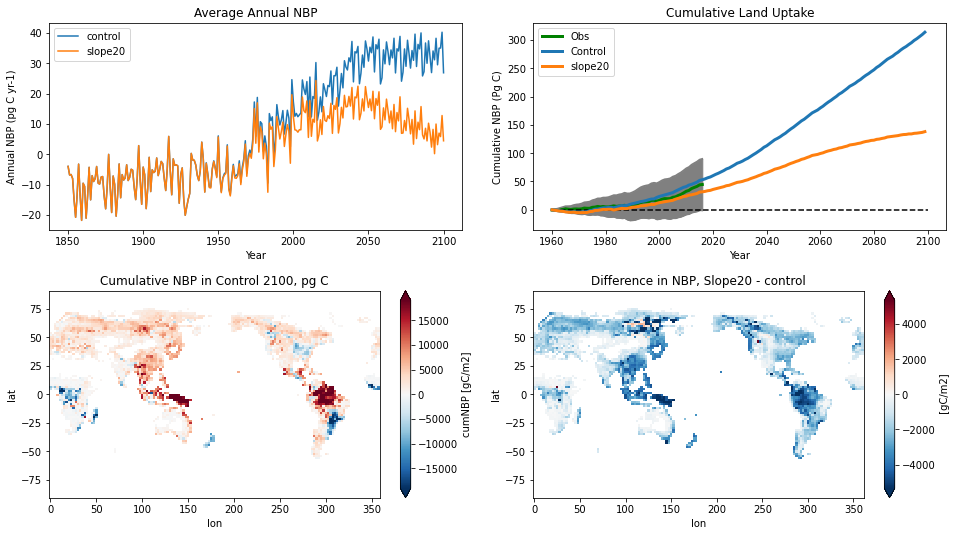

In [33]:
###Plot a) Annual average NBP
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
fig, axs = plt.subplots(2, 2,  figsize=(14,8))
fig.tight_layout(pad=4)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['NBP'] = ann_glob.get('NBP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['NBP'] = ann_glob.get('NBP').attrs

axs[0,0].plot(ann_Awgt_sub.coords['time.year'], NBP0.get('NBP'), label = "control");
axs[0,0].plot(ann_Awgt_sub.coords['time.year'], NBP1.get('NBP'), label = "slope20");
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Annual NBP (pg C yr-1)')
axs[0,0].set_title('Average Annual NBP');
axs[0,0].legend(loc='upper left');


### Plotb)
axs[0,1].plot(year_range,cum_Land, linewidth = 3, label = "Obs", color = "green")
axs[0,1].plot(year_range,cum_LandH, color = 'grey')
axs[0,1].plot(year_range,cum_LandL, color = 'grey')
axs[0,1].fill_between(year_range, cum_LandH,cum_LandL, color='grey')
axs[0,1].hlines(0,1960, 2100, color = 'black', linestyles = 'dashed')
control = cNBP['NBP'].sel(time = slice('1960-12-16','2099-12-16'), case = 'cnSlope0').values + (93.3203492)
cnMulti = cNBP['NBP'].sel(time = slice('1960-12-16','2099-12-16'), case = 'cnSlope20').values + (93.92729433)
axs[0,1].plot(year_range2,control, linewidth = 3, label = 'Control', color = "#1f77b4")
axs[0,1].plot(year_range2,cnMulti, linewidth = 3, label = "slope20", color = "#ff7f0e");
axs[0,1].set_title('Cumulative Land Uptake')
axs[0,1].set_ylabel('Cumulative NBP (Pg C)');
axs[0,1].set_xlabel('Year')
axs[0,1].legend();


### plot c) first map, just use 2100 or average of last 10 years? 
z = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['cumNBP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['cumNBP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']
##Metadata needs added here for plots. 
zdiff.attrs = dsAnn.get('cumNBP').attrs
z.attrs = dsAnn.get('cumNBP').attrs
z.plot(robust = True, ax = axs[1,0]);#, cmap = 'Blues_r') ;
axs[1,0].set_title('Cumulative NBP in Control 2100, pg C')
zdiff.plot(robust = True, ax = axs[1,1]); #, cmap = 'Blues_r') 
axs[1,1].set_title('Difference in NBP, Slope20 - control');
# plt.title('CN Multi - Control')



## Water cycle varibles (Choose one for Fig 4, either maps/line plots or scatter plot variation)


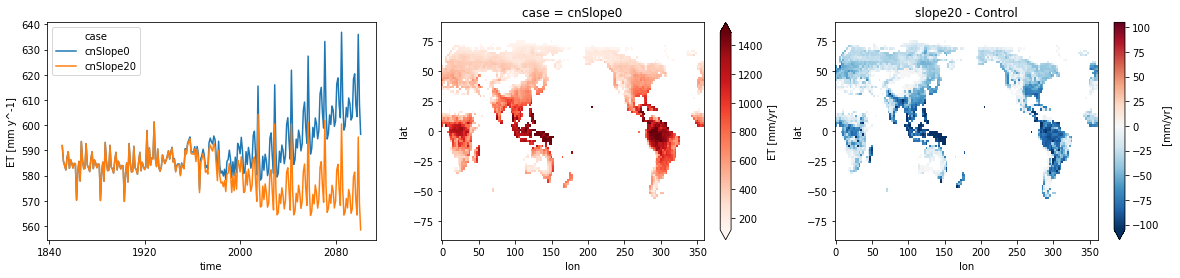

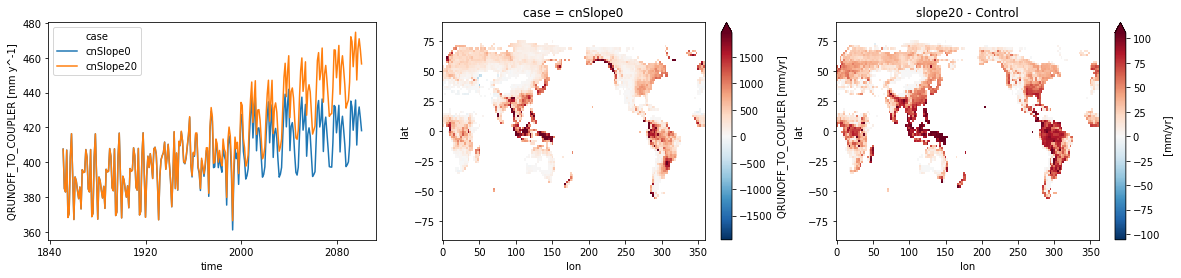

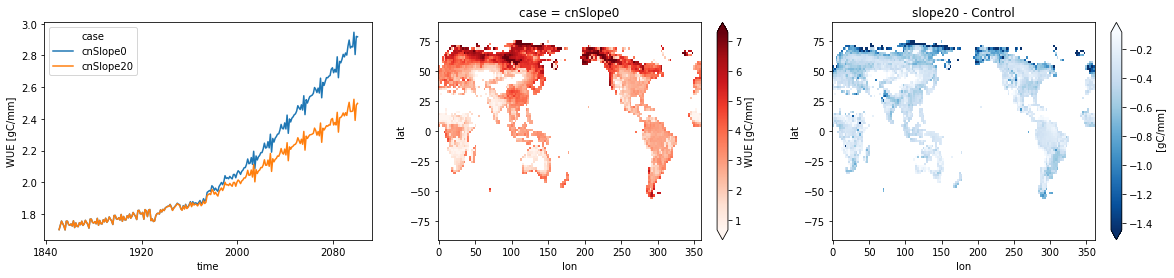

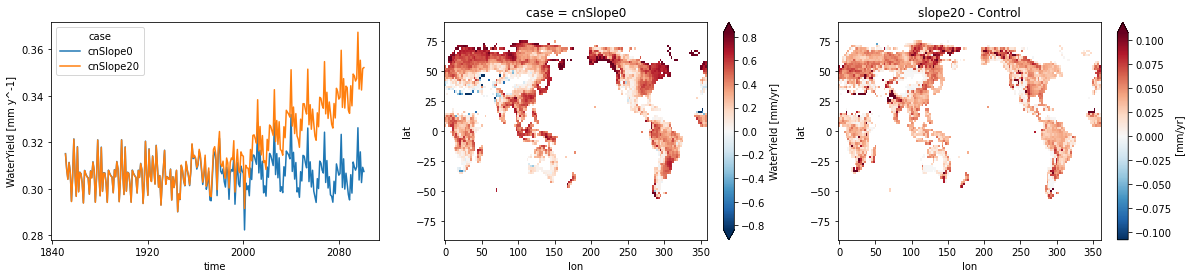

In [68]:
### Plot ET and runoff

EcoVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WUE', 'WaterYield' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(4):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    z.attrs = dsAnn.get(EcoVars[i]).attrs
    zdiff.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'ET':
        z.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('ET Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
    if EcoVars[i] == 'QRUNOFF_TO_COUPLER':
        z.plot(robust = True, ax = ax[1])
        plt.title('Runoff Control')
        zdiff.plot(robust = True, ax = ax[2])# cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
    if EcoVars[i] == 'WUE':
        z.plot(robust = True, ax = ax[1], cmap = 'Reds')
        plt.title('WUE Control')
        zdiff.plot(robust = True, ax = ax[2], cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
    if EcoVars[i] == 'WaterYield':
        z.plot(robust = True, ax = ax[1])#, cmap = 'Reds')
        plt.title('WaterYield Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('slope20 - Control')
        
##Notes/to do: Units need added on maps, lost somewhere further up. Also runoff and wateryield units seem weird? Should be mm/yr, which is what the value says but the numbers themselves seem a little funny. 



#### Change in GPP vs Change in ET, control vs treatment scatterplot

In [69]:
#useful function from CTSM workshop 
# #Defining generic function for scatter plots
def detailed_scatter (x, y, color):
    plt.scatter (x,y, marker="o",color = color)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line,'black', label='y={:.2f}x+{:.2f}'.format(slope,intercept)+" (R2="+"{:.2f}".format(r_value)+")")
    plt.legend(fontsize=13)

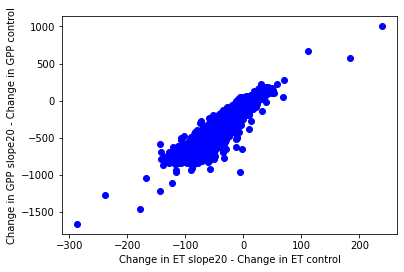

In [70]:
#plt.figure(num=None, figsize=(15, 5),  facecolor='w', edgecolor='k')
GPPControlStart = dsAnn.isel(case=0,time=slice(0,1)).mean('time')['GPP']
GPPControlEnd = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['GPP']
GPPSlope20Start = dsAnn.isel(case=1,time=slice(0,1)).mean('time')['GPP']
GPPSlope20End = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['GPP']
DiffGPP = (GPPSlope20End-GPPSlope20Start)-(GPPControlEnd-GPPControlStart)

ETControlStart = dsAnn.isel(case=0,time=slice(0,1)).mean('time')['ET']
ETControlEnd = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['ET']
ETSlope20Start = dsAnn.isel(case=1,time=slice(0,1)).mean('time')['ET']
ETSlope20End = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['ET']
DiffET = (ETSlope20End-ETSlope20Start)-(ETControlEnd-ETControlStart)

#plt.subplot(1, 3, 1)
plt.scatter(DiffET,DiffGPP, marker="o",color = 'b');
plt.ylabel('Change in GPP slope20 - Change in GPP control')
plt.xlabel('Change in ET slope20 - Change in ET control');
# plt.ylabel('CLM Latent Heat [W m-2]')
# plt.xlabel('CLM Canopy Evaporation [W m-2]')

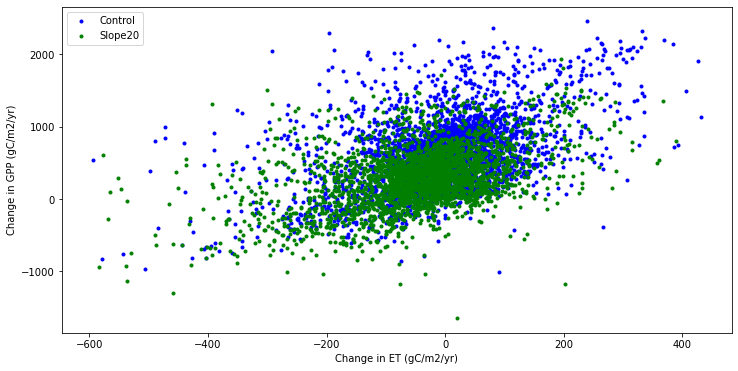

In [71]:
## Could also plot changes for control and changes for slope20 as 2 different colors rather than subtracting them.
## These could also be 2 side by side plots
DiffGPPCont = GPPControlEnd - GPPControlStart
DiffETCont = ETControlEnd - ETControlStart
DiffGPPSlope20 = GPPSlope20End - GPPSlope20Start
DiffETSlope20 = ETSlope20End - ETSlope20Start

plt.figure(num=None, figsize=(12, 6),  facecolor='w', edgecolor='k')
plt.scatter(DiffETCont, DiffGPPCont, marker=".",color = 'b', label = "Control")
plt.scatter(DiffETSlope20, DiffGPPSlope20, marker=".",color = 'g', label = "Slope20");
plt.ylabel("Change in GPP (gC/m2/yr)")
plt.xlabel("Change in ET (gC/m2/yr)")
plt.legend();

##ToDo/Questions: Would regression lines here be helpful? Have been looking into the coding for it but running into trouble with the dimensions.

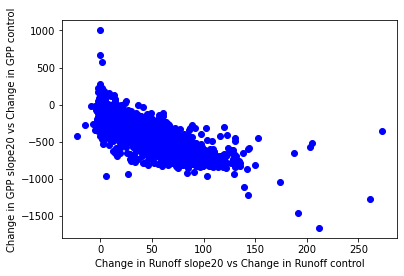

In [72]:
### Try for runoff out of curosity
#plt.figure(num=None, figsize=(15, 5),  facecolor='w', edgecolor='k')

ROControlStart = dsAnn.isel(case=0,time=slice(0,1)).mean('time')['QRUNOFF_TO_COUPLER']
ROControlEnd = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')['QRUNOFF_TO_COUPLER']
ROSlope20Start = dsAnn.isel(case=1,time=slice(0,1)).mean('time')['QRUNOFF_TO_COUPLER']
ROSlope20End = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')['QRUNOFF_TO_COUPLER']
DiffRO = (ROSlope20End-ROSlope20Start)-(ROControlEnd-ROControlStart)

#plt.subplot(1, 3, 1)
plt.scatter (DiffRO,DiffGPP, marker="o",color = 'b');
plt.ylabel('Change in GPP slope20 vs Change in GPP control')
plt.xlabel('Change in Runoff slope20 vs Change in Runoff control');
# plt.ylabel('CLM Latent Heat [W m-2]')
# plt.xlabel('CLM Canopy Evaporation [W m-2]')

In [73]:
### Calculate WUE change

## WUE in 2100, control case
ControlWUE = ann_Awgt_sub['WUE'].isel(case=0, time =250).values  

## WUE in 2100, slope 20 case 
Slope20WUE = ann_Awgt_sub['WUE'].isel(case=1, time =250).values  

## Calculate % difference/change
(Slope20WUE - ControlWUE)/ControlWUE

## ~14% reduced

-0.1438186421105041

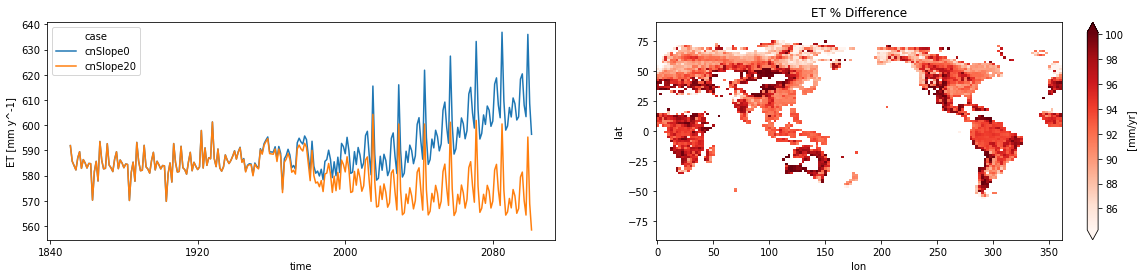

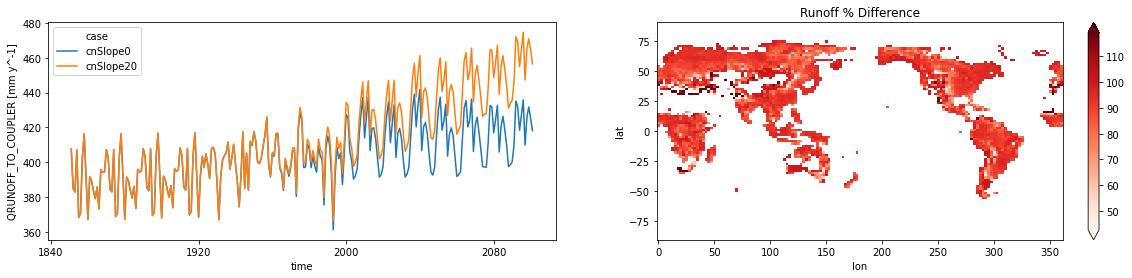

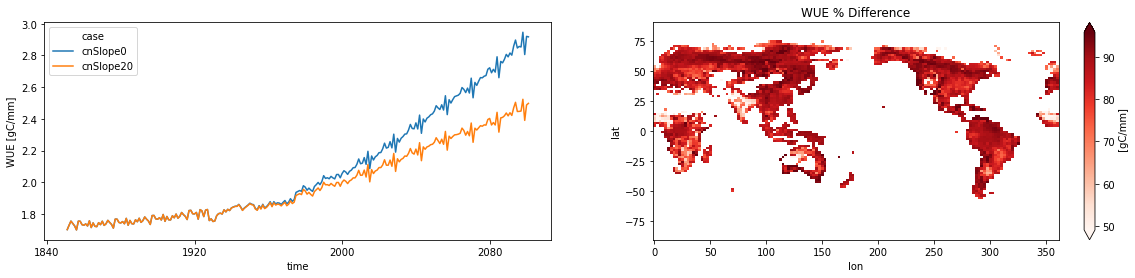

In [74]:
### Try some different difference plots
 # % difference, 100*Slope20/Control
 # Response ratio ln(slope20/control)

minGPP2 = 10
ann_Awgt_sub = ann_Awgt_sub.where(ann_Awgt_sub.GPP.min('time') > minGPP2)
minET = 10
ann_Awgt_sub = ann_Awgt_sub.where(ann_Awgt_sub.ET.min('time') > minET)

EcoVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WUE' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(3):
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);

 ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    percentDiff = 100 * z20/z
    percentDiff = utils.cyclic_dataarray(percentDiff)
    lat = percentDiff.coords['lat']
    lon = percentDiff.coords['lon']
    
    percentDiff2 = 100 * z/z20
    percentDiff2 = utils.cyclic_dataarray(percentDiff2)
    lat = percentDiff.coords['lat']
    lon = percentDiff.coords['lon']
    ##Metadata needs added here for plots. 
    percentDiff.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'ET':
        percentDiff.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('ET % Difference')
    if EcoVars[i] == 'QRUNOFF_TO_COUPLER':
        percentDiff2.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('Runoff % Difference')
    if EcoVars[i] == 'WUE':
        percentDiff.plot(robust = True, ax = ax[1], cmap = "Reds")
        plt.title('WUE % Difference')


/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


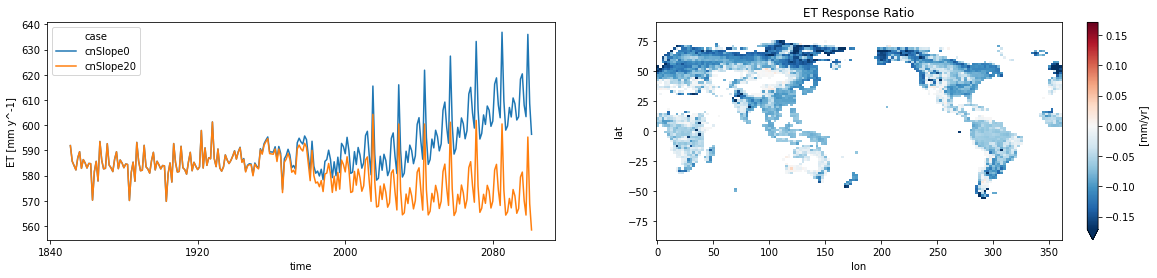

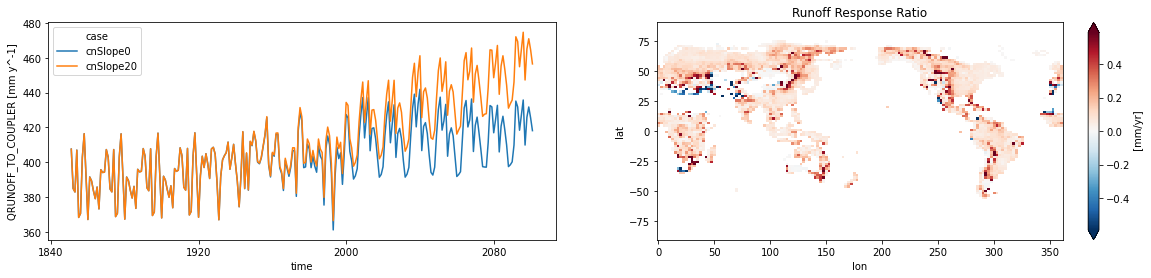

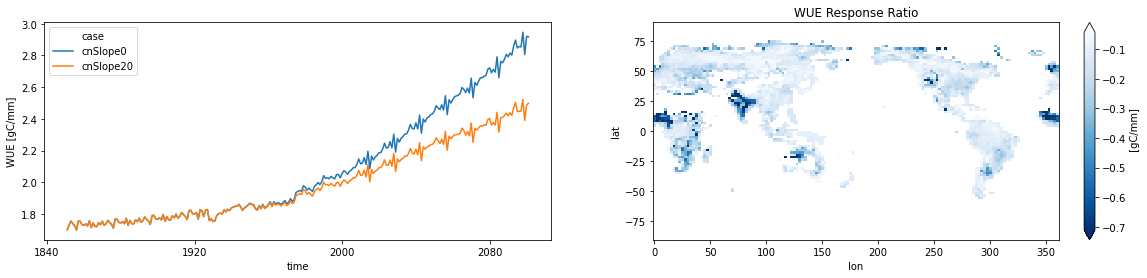

In [75]:
EcoVars = ['ET', 'QRUNOFF_TO_COUPLER', 'WUE' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(3):
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    ann_Awgt_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);

 ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')[EcoVars[i]]
    RR = np.log(z20/z)
    RR = utils.cyclic_dataarray(RR)
    lat = RR.coords['lat']
    lon = RR.coords['lon']
    ##Metadata needs added here for plots. 
    RR.attrs = dsAnn.get(EcoVars[i]).attrs
    if EcoVars[i] == 'ET':
        RR.plot(robust = True, ax = ax[1])
        plt.title('ET Response Ratio')
    if EcoVars[i] == 'QRUNOFF_TO_COUPLER':
        RR.plot(robust = True, ax = ax[1])
        plt.title('Runoff Response Ratio')
    if EcoVars[i] == 'WUE':
        RR.plot(robust = True, ax = ax[1], cmap = "Blues_r")
        plt.title('WUE Response Ratio')


In [76]:
##Calculate and plot water yield



## N specific plots (Fig 5)

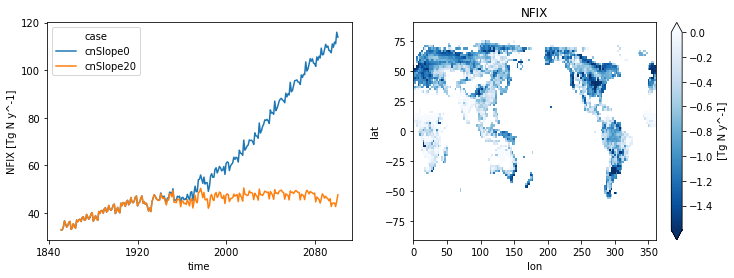

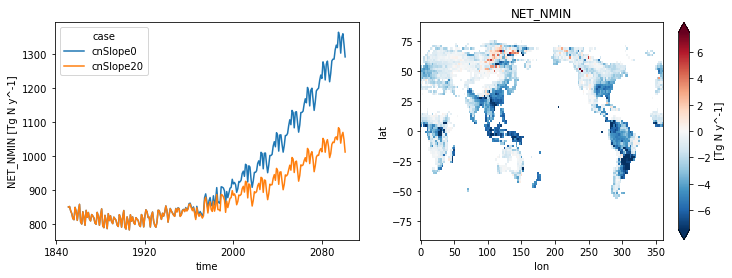

In [77]:
##Plot N vars

## Ecosystem feedback plots
# Include NPP, Nmin, Nfix, LITTERCN
EcoVars =  ['NFIX', 'NET_NMIN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(2):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ann_glob_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare last 10 y of slope 0 case and CN multi
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = ann_glob.get(EcoVars[i]).attrs
    if EcoVars[i] == 'NFIX':
        zdiff.plot(robust = True, ax = ax[1], cmap = 'Blues_r') ;
    if EcoVars[i] == 'NET_NMIN':
        zdiff.plot(robust = True, ax = ax[1])#, cmap = 'Blues_r') ;
    plt.title(EcoVars[i])

### Plots for supplemental data section and some other plotting experiments/ideas
 - Box plot for ranges of CN across different CO2 conditions from FACE experiments (eucFace, SPRUCE, others?)
 - Other scenarios/simulation runs more/less extreme (instead of slope 20)? Uncertainty analyses? 
 - LAI, FPI? 
 - Tables with rates (NPP, NBP, GPP, ER, HR, NFIX, NMIN etc. Maybe for start, now and 2100?) 

#### LAI Plot

In [ ]:
# Plot global LAI, summer difference last 10 years

# dsMax = ds.ELAI.where(ds.GPP.groupby('time.year')).idxmax('time')
# print(dsMax)

##Calculate seasonal means
leafYear_0 = dsFull.resample(time='QS-DEC').max().isel(time=slice(0,-1))
leaf_summer = leafYear_0.where(leafYear_0.time['time.month']==6, drop=True)

#area weighted mean
leaf_summer2 = (leaf_summer * area_wgt).sum(dim=('lat', 'lon'))
leaf_summer2 = leaf_summer2.isel(case = [0,1])

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
leaf_summer2.ELAI.plot(hue = 'case');

plt.subplot(1,2,2)
y = leaf_summer.isel(case=0,time=slice(-10,None)).mean('time')['ELAI']# Climatology for last 10 years of data
y20 = leaf_summer.isel(case=1,time=slice(-10,None)).mean('time')['ELAI']
ydiff = y20 - y
ydiff = utils.cyclic_dataarray(ydiff)
lat = ydiff.coords['lat']
lon = ydiff.coords['lon']
ydiff.plot(robust = True) ;


/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/glade/work/ehauser/opt/miniconda/envs/analysis/lib/python3.10/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
